In [1]:
# importing all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import seaborn as sns

# Project 1

## Data Loading

In [2]:
# a - Load the dataset
df = pd.read_csv('prisoners.csv')
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [3]:
df.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


In [4]:
# b - finding out no. of columns
df.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


## Data Manipulation

In [5]:
# a - creating a new column
df['Total_Benefited'] = df[df.columns[2:6]].sum(axis=1)
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,Total_Benefited
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470
3,Bihar,2013,1693,3013,125,1417,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762


In [6]:
# b - creating a new row
# df.append(df[df.columns[2:6]].sum(axis=0))
df.loc['Total'] = df[df.columns[2:7]].sum()
df.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,Total_Benefited
31,Daman & Diu,2013.0,0.0,0.0,0.0,0.0,0.0
32,Delhi,2013.0,1458.0,1187.0,908.0,174.0,3727.0
33,Lakshadweep,2013.0,0.0,0.0,0.0,0.0,0.0
34,Pondicherry,2013.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,NaN,37027.0,53720.0,8311.0,7356.0,106414.0


## Plotting

<BarContainer object of 35 artists>

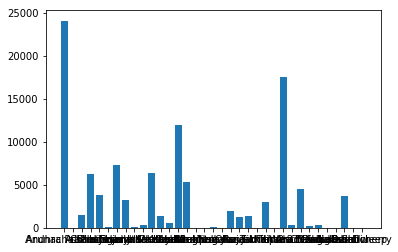

In [7]:
# a-bar plot
plt.bar(df['STATE/UT'][0:35],df.Total_Benefited[0:35])
# ax.legend(fontsize = 14)

In [8]:
df.iloc[35,2:6]

No. of Inmates benefitted by Elementary Education    37027
No. of Inmates benefitted by Adult Education         53720
No. of Inmates benefitted by Higher Education         8311
No. of Inmates benefitted by Computer Course          7356
Name: Total, dtype: object

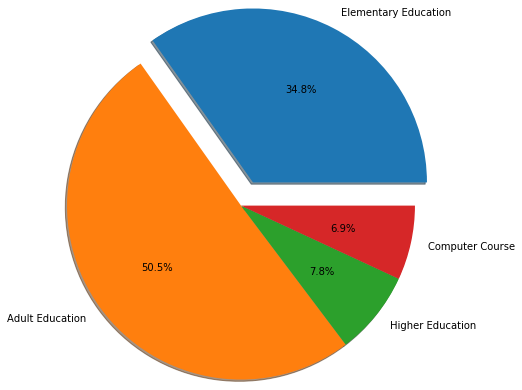

In [9]:
# b-Pie chart
# pie_vals = [df['No. of Inmates benefitted by Elementary Education'].tail(1),
#            df['No. of Inmates benefitted by Adult Education'].tail(1),
#            df['No. of Inmates benefitted by Higher Education'].tail(1),
#            df['No. of Inmates benefitted by Computer Course'].tail(1)]

pie_vals = df.iloc[35,2:6]

pie_labels = ['Elementary Education',
             'Adult Education',
             'Higher Education',
             'Computer Course']

plt.axis('equal')
plt.pie(
    pie_vals, 
    labels=pie_labels,
    shadow=True,
    explode=[0.3,0,0,0],
    autopct='%0.1f%%',
    radius = 2,
)
plt.show()

# Project 2

# Data Loading 

In [10]:
df = pd.read_csv('cereal.csv')
df.head()
# df.count()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
df[['sugars','vitamins']].max()

sugars       15
vitamins    100
dtype: int64

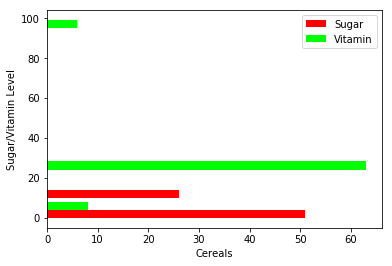

In [12]:
# histogram
plt.hist(
    [df.sugars,df.vitamins], 
#     bins=[0,25,50,100],
    orientation='horizontal',
    color=['red','lime'], 
    label=['Sugar','Vitamin']
)
plt.xlabel('Cereals')
plt.ylabel('Sugar/Vitamin Level')
plt.legend()

## Data Manipulation

In [13]:
df['Manufactures'] = df.mfr.map({
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills',
    'P': 'Post',
    'A': 'American Home Food Products'
})

cols = list(df.columns.values) #Make a list of all of the columns in the df
df = df[cols[0:2]+[cols[-1]]+cols[2:16]]
df.head()

,name,mfr,Manufactures,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,Raslston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<BarContainer object of 7 artists>

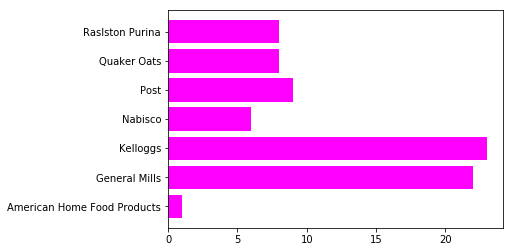

In [14]:
# Create a bar plot where each manufacturer is on the y axis and the height of the
# bars depict the number of cereals manufactured by them.
cereals_manufactured = df.groupby('Manufactures').count()['name']
cereals_manufactured
df.Manufactures.sort_values().unique()

plt.barh(df.Manufactures.sort_values().unique(),cereals_manufactured, 
        color = 'Magenta',
       )

## Training and Testing

In [15]:
# Extract the rating as your target variable ‘y’ and all numerical parameters as your
# predictors ‘x’. Separate 25% of your data as test set.
# rows = np.random.randint(0,78,20)
# rows

train, test = train_test_split(df, test_size=0.25)
y_train = train.rating
y_test = test.rating

reg=linear_model.LinearRegression()
reg.fit(train[['calories','protein','fat','sodium','fiber','carbo',
              'sugars','potass','vitamins','shelf','weight','cups']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
reg.coef_

array([-2.22724162e-01,  3.27317385e+00, -1.69140802e+00, -5.44927019e-02,
        3.44347976e+00,  1.09245094e+00, -7.24895151e-01, -3.39933505e-02,
       -5.12119686e-02, -6.72566574e-08, -4.40636939e-07, -3.59776133e-08])

In [17]:
reg.intercept_

54.92718452558431

In [18]:
# Making the prediction on the test dataset
y_pred = reg.predict(test[['calories','protein','fat','sodium','fiber','carbo',
              'sugars','potass','vitamins','shelf','weight','cups']])
y_pred

# y_pred = reg.predict(train[['calories','protein','fat','sodium','fiber','carbo',
#               'sugars','potass','vitamins','shelf','weight','cups']])
# y_pred

array([40.40020796, 64.53381595, 36.47151205, 49.12025293, 53.37100733,
       39.2591973 , 46.89564361, 49.78744517, 68.40297276, 34.13976447,
       28.02576459, 29.9242853 , 28.59278468, 41.01549173, 35.25244373,
       39.10617426, 46.65884426, 31.07221741, 41.44501956, 33.17409431])

In [19]:
# Mean Square Error
mean_squared_error(y_test, y_pred)

# mean_squared_error(y_train, y_pred)

9.725929389929792e-14

#  Project 3

In [20]:
# Reading the data
df = pd.read_csv('FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Compute and use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

In [21]:
corr = df.corr(method = 'pearson')
corr

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


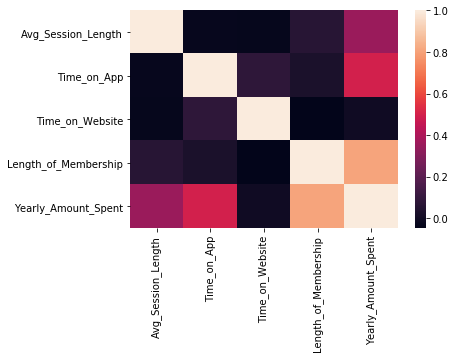

In [22]:
sns.heatmap(corr)

# There is almost 0 correlation b/w Time on Website and Yearly Amount Spent which means
# that people who are browsing the website don't usually buy the products from the website

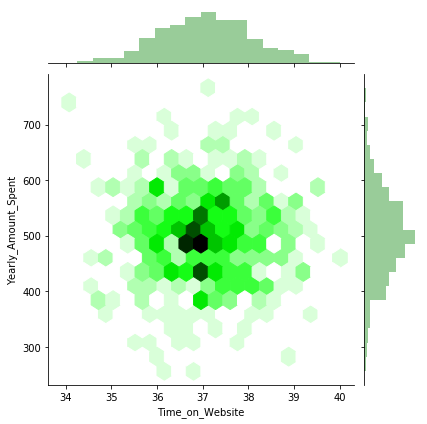

In [23]:
sns.jointplot(df['Time_on_Website'],df['Yearly_Amount_Spent'], 
              data = df, 
              kind="hex",
             color = 'g')

### Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

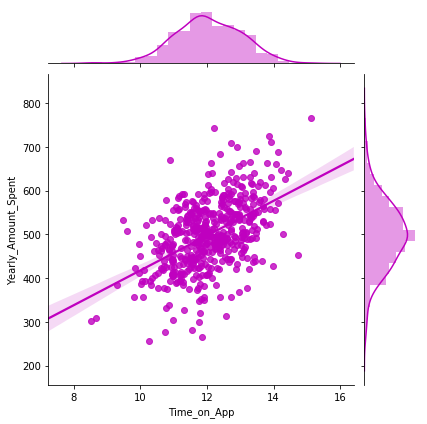

In [24]:
# A very strong correlation b/w Time on App and Yearly Amount Spent. 
# It's much greater than the previous case
sns.jointplot(df['Time_on_App'],df['Yearly_Amount_Spent'], 
              data = df, 
              kind="reg",
             color = 'm')

### Compute and explore types of relationships across the entire data set using pairplot .Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

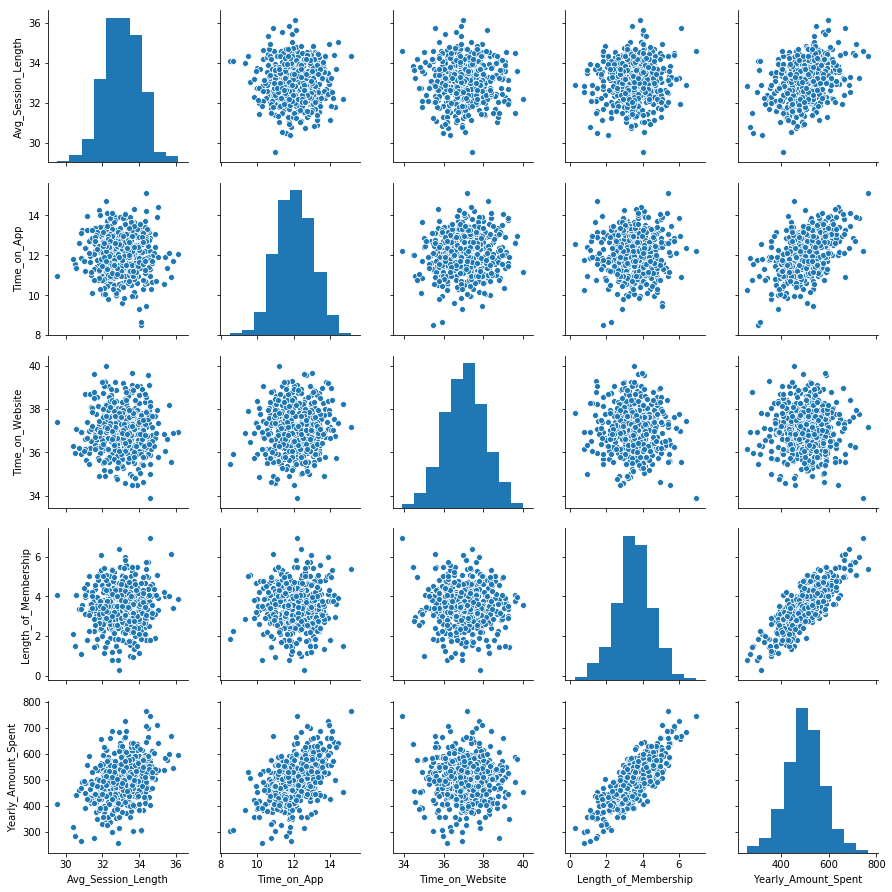

In [25]:
sns.pairplot(df)
# Length of membership and Yearly amount spent are the most linearly correlated.

### Compute and create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

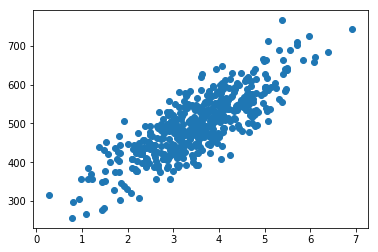

In [26]:
plt.scatter(df.Length_of_Membership, df.Yearly_Amount_Spent)

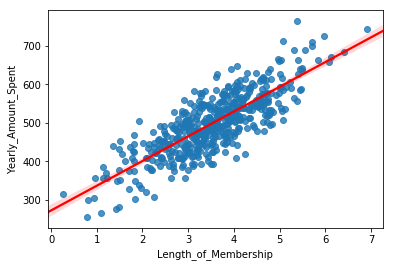

In [27]:
sns.regplot(df.Length_of_Membership, df.Yearly_Amount_Spent,
            line_kws = {'color':'red'},
           )

### Using sklearn. train_test_split to split the data -- What is the use of random_state=85?

In [28]:
train, test = train_test_split(df, 
                               test_size=0.25,
                              random_state=85,
                              )
test
# train

# Random_state stops the train_test_split to produce random test datasets on concurrent runs of 
# the code.

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
412,ellenlucas@cox.org,"86268 Davis Corner\nNorth Danielview, CT 59551...",DarkGoldenRod,33.863189,11.523523,35.938045,3.013033,444.053827
266,christophermorrison@mcguire-carter.biz,"90089 Eric Well\nNicoleside, MT 95918",Blue,34.555283,11.777772,37.979827,3.784273,554.003093
309,dblair@gmail.com,"190 Kelley Burg\nWest Juliaport, IA 35826-8163",MediumSlateBlue,34.102279,8.508152,35.462400,1.838211,302.189548
212,baldwinbryan@estrada-silva.biz,"1470 Kathleen Pass\nSouth Christopherberg, SD ...",MediumSeaGreen,33.304431,12.378490,38.764297,3.843849,536.130897
105,taylor91@hotmail.com,"3132 Willie Harbor\nKaylafurt, FL 01107",CadetBlue,33.468700,13.085506,35.845827,2.926940,497.513683
323,mitchellscott@gmail.com,"3976 Tom Streets Suite 438\nPort Davidtown, AL...",DarkOrange,32.762456,10.952353,37.646292,4.019470,473.360496
274,wellsjuan@schroeder.com,"0338 Francis Junction\nLake Alexstad, NH 14302",Green,31.818617,11.226546,35.669935,3.755869,446.418673
167,turnerryan@hotmail.com,"770 Lewis Pike Apt. 869\nPhelpsport, PA 93969-...",LightSkyBlue,34.046638,12.474455,35.037856,4.055776,578.986259
284,zachary94@gmail.com,"99902 Scott Road\nJoyton, MT 46760-7400",Purple,31.312350,11.684904,38.717076,3.594295,463.591418
341,dbell@hotmail.com,"3485 Anthony Street Apt. 119\nMikeberg, FL 32602",DarkViolet,34.461515,11.917116,37.766687,4.350888,592.688453


In [29]:
# Training the data first
y_train = train.Yearly_Amount_Spent
y_test = test.Yearly_Amount_Spent

reg=linear_model.LinearRegression()
reg.fit(train[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']]
        ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Predicting the data
y_pred = reg.predict(train[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']])
y_pred

array([486.39991566, 512.38263728, 606.19394078, 554.30253039,
       667.88432685, 433.06219114, 399.34607254, 455.8998185 ,
       583.41006614, 553.90004468, 574.68189249, 374.51488518,
       548.11305009, 566.95153036, 558.11201072, 451.03358115,
       472.22270615, 426.68851472, 432.72362951, 652.46613882,
       575.80773354, 577.54988366, 466.09892781, 481.99743119,
       608.4392734 , 522.60258744, 353.0102859 , 570.11215643,
       531.64396618, 440.93327336, 508.25741193, 432.41533068,
       437.10940729, 458.18519971, 559.7357948 , 525.48065924,
       703.20220876, 423.39326596, 461.10513306, 389.2274392 ,
       557.07424424, 414.01279575, 574.58190846, 553.58121038,
       394.70797751, 397.43182492, 385.96146175, 448.83618501,
       684.93884429, 494.96119424, 583.32710789, 550.80797595,
       558.91260107, 460.52121455, 547.69121158, 561.25878993,
       445.33747937, 493.54410545, 563.39998548, 425.98459367,
       535.08311221, 449.25805241, 643.68291635, 430.13

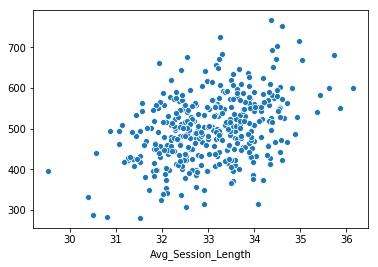

In [31]:
sns.scatterplot(train['Avg_Session_Length'],y_pred)

In [34]:
root_mse = np.sqrt(mean_squared_error(y_train, y_pred))
root_mse


9.806066379312645